# EDA (Exploratory Data Analysis)

## Summary

Data forecasting - the process of using historical and current data to predict future events or trends, employing statistical models and AI/ML techniques to identify patterns and extrapolate them into educated guesses about what might happen next. It serves as a critical planning tool for businesses and other sectors to anticipate change, manage resources, and make informed strategic decisions, though accuracy depends on data quality and chosen methods. 

READING ALL THE REQUIRED LIBRARIES AND PACKAGES

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import multiprocessing as mp
from tqdm import tqdm

In [2]:
df = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\calendar.csv')
df1 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_validation.csv') # Used for training
df2 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sell_prices.csv')
df3 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_evaluation.csv') # Used for testing

In [3]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


We can observe that 4 entries (event_name_1, event_name_2, event_type_1, event_name_2) contain NaN(Not a Number) value

In [4]:
df1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


Overall we have sales for 1919 days

In [5]:
df2.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
df3.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


However in the dataset above, we have sales data for 1947 days. Which is why I want to use this dataframe for testing

In [7]:
print("Shape of calendar.csv", df.shape)
print("Shape of sales_train_validation.csv", df1.shape)
print("Shape of sell_prices.csv", df2.shape)
print("Shape of sales_train_evaluation.csv", df3.shape)

Shape of calendar.csv (1969, 14)
Shape of sales_train_validation.csv (30490, 1919)
Shape of sell_prices.csv (6841121, 4)
Shape of sales_train_evaluation.csv (30490, 1947)


Let's not forget that in calendar.csv file we have many entries with NaN value. Instead we can say that those entries are not available

In [8]:
df = df.fillna(value = 'N/A')

In [9]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,N/A,N/A,N/A,N/A,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,N/A,N/A,N/A,N/A,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,N/A,N/A,N/A,N/A,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,N/A,N/A,N/A,N/A,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,N/A,N/A,N/A,N/A,1,0,1


We need to have days as particular columns, so I had to modify sales_train_evaluation.csv file and assign the changed structure of it.

In [10]:
df1 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_validation.csv')
l=[]
for i in range(1,1914):
    l.append("d_"+str(i))
df_final=pd.melt(df1,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")

This is increasing the size of csv file massively, but I don't need that much data.I am taking only last 28 data days of test because eariler values are same as for train

In [11]:
df3 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sales_train_evaluation.csv')
l=[]
for i in range(1914,1942):
    l.append("d_"+str(i))
df_final_test=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")

In [12]:
for i in range(1942,1970):
    df3['d_'+str(i)]=0

Now we create the future data that are going to be used for future sales data

In [13]:
l=[]
for i in range(1942,1970):
    l.append("d_"+str(i))
df_future_data=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
    value_vars=l,var_name="d",value_name="sales")  

Let's merge all 3 dfs so we can get the final csv file train

In [14]:
df = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\calendar.csv')
df2 = pd.read_csv(r'C:\Users\Wiktor\Downloads\m5-forecasting-accuracy\sell_prices.csv')

In [15]:
data=df_final.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data=data.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
data.to_csv('final_dataframe.csv',index=False)

In [16]:
#Now we merge all These 3 dataframes to get final csv file test
data_test=df_final_test.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_test=data_test.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
data_test.to_csv('final_dataframe_test.csv',index=False)

In [17]:
#Now we merge all These 3 dataframes to get final csv file future data
data_future=df_future_data.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_future=data_future.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_future_data.csv
data_future.fillna('no_event',inplace=True)
data_future.to_csv('final_future_data.csv',index=False)

In [18]:
print("Shape of final dataframe train is=",data.shape)
print("Shape of final dataframe test is=",data_test.shape)

Shape of final dataframe train is= (46027957, 22)
Shape of final dataframe test is= (853720, 22)


We can see that the amount of data is huge

In [19]:
#reading up complete dataframe
data=pd.read_csv('final_dataframe.csv')
data_test=pd.read_csv('final_dataframe_test.csv')


C:\Users\Wiktor\AppData\Local\Temp\ipykernel_17656\1915225771.py:2: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('final_dataframe.csv')
C:\Users\Wiktor\AppData\Local\Temp\ipykernel_17656\1915225771.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test=pd.read_csv('final_dataframe_test.csv')


EXPLORING VARIOUS PROPERTIES OF DF

In [20]:
print("Head rows of Final DataFrame train")
data.head()

Head rows of Final DataFrame train


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.56
2,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.17
3,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,5.98
4,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70


In [21]:
print("Columns present in dataFrame are",data.columns.values)

Columns present in dataFrame are ['id' 'item_id' 'dept_id' 'cat_id' 'store_id' 'state_id' 'd' 'sales'
 'date' 'wm_yr_wk' 'weekday' 'wday' 'month' 'year' 'event_name_1'
 'event_type_1' 'event_name_2' 'event_type_2' 'snap_CA' 'snap_TX'
 'snap_WI' 'sell_price']


In [22]:
print("Here the is a complete information about data Frame is:-\n")
print(data.info())

Here the is a complete information about data Frame is:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 7.5+ GB
None


Clearly this data frame is using a lot memory(7.5+GB) so we will try to remove unnecessary features

In [23]:
print("There are these unique stores in this data=",data['store_id'].unique())

There are these unique stores in this data= ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [24]:
print("There are these states in data=",data['state_id'].unique())

There are these states in data= ['CA' 'TX' 'WI']


In [25]:
print("Unique values of wday features=",data['wday'].unique())
print("Unique values of weekday features=",data['weekday'].unique())

Unique values of wday features= [1 2 3 4 5 6 7]
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [26]:
print("Years for which I have this sales data=",data['year'].unique())

Years for which I have this sales data= [2011 2012 2013 2014 2015 2016]


In [27]:
print("Months in year 2016 for which we have data",data[data['year']==2016]['month'].unique())

Months in year 2016 for which we have data [1 2 3 4]


DATA ANALYSIS (using bar graphs and pie charts)

A bar graph that shows average sales for each category, and a pie chart that shows percentage of sales for each category

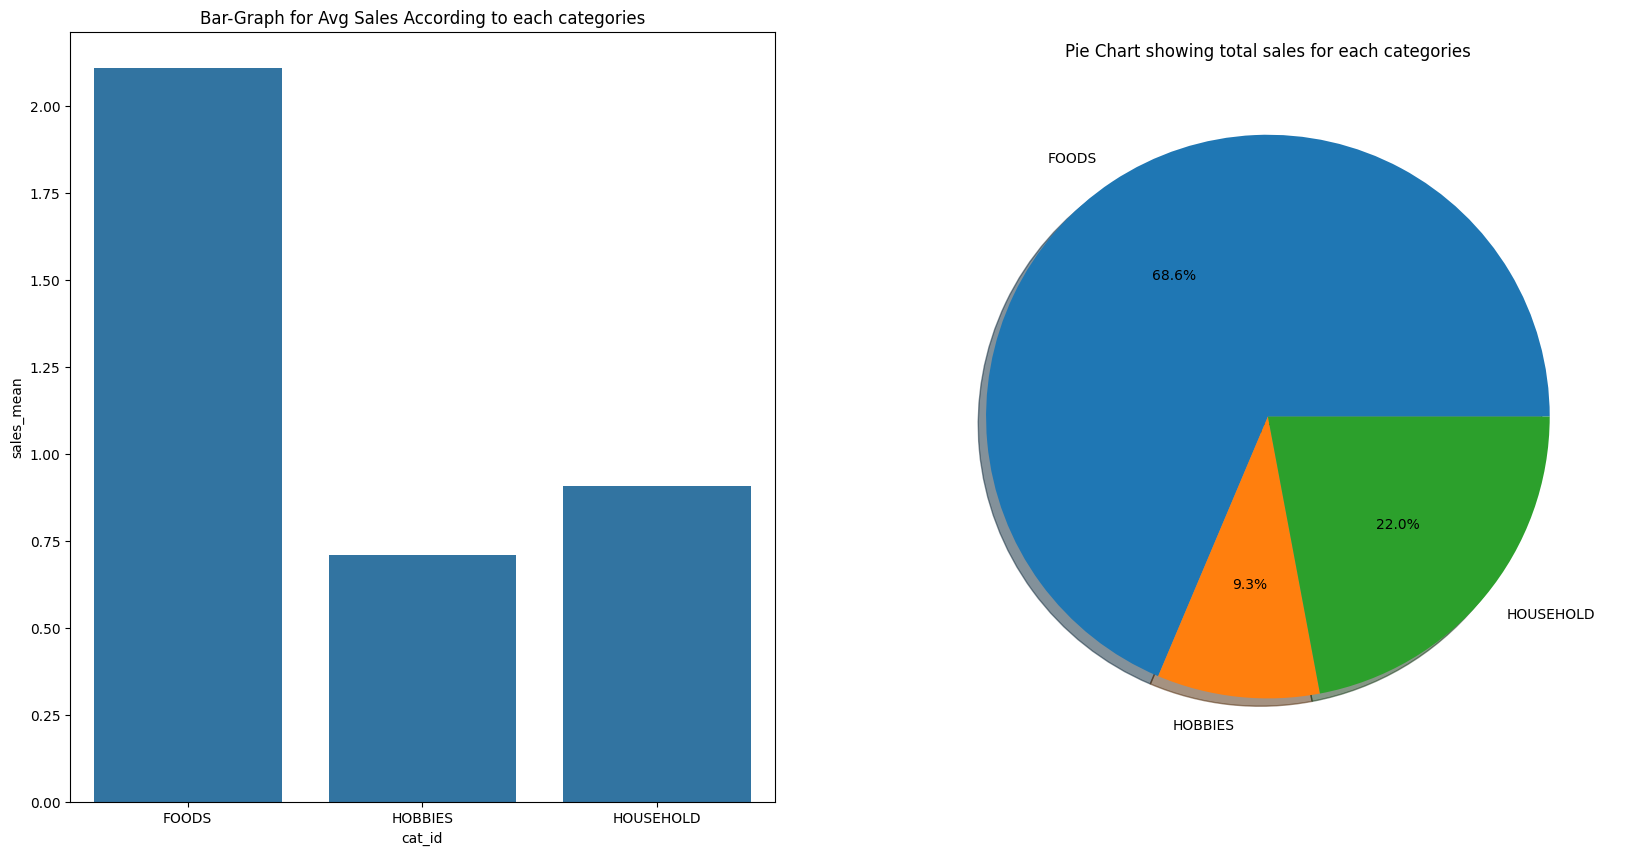

In [28]:
# First, create an aggregated dataframe to avoid repeated groupby operations
df_agg = data.groupby('cat_id').agg({
    'sales': ['mean', 'sum']
}).reset_index()
df_agg.columns = ['cat_id', 'sales_mean', 'sales_sum']

# Calculate percentage
df_agg['perc'] = df_agg['sales_sum'] / df_agg['sales_sum'].sum() * 100

plt.figure(figsize=(20,10))

# Bar plot
plt.subplot(121)
sns.barplot(x='cat_id', y='sales_mean', data=df_agg)
plt.title("Bar-Graph for Avg Sales According to each categories")

# Pie chart
plt.subplot(122)
plt.pie(df_agg['perc'].values, labels=df_agg['cat_id'].values, shadow=True, autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories")

plt.show()

In [ ]:
df=data.groupby('cat_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='cat_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each categories")

plt.subplot(122)
df=data.groupby('cat_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['perc'].values,labels=df['cat_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories")
plt.show()

We can clearly see for these graphics above that average and total sales of FOODS are maximum. Let's now create a bar graph for average sales for each State provided, and a pie chart showing the percentage of sales for each State.

In [ ]:
df=data.groupby('state_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='state_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each state")

df=data.groupby('state_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['state_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart Total showing sales for each state")
plt.show()

Here we see that the highest average and total sales are in California. Now let's find out the sales and an percentage for each store provided in the dataset.

In [ ]:
df=data.groupby('store_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='store_id',y='sales',data=df)
plt.title("Bar-Graph for  AVG Sales According to each store")
df=data.groupby('store_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['store_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each store")

plt.show()

The store CA_3 has the maximum total sales and an average. Our next step will be a generation of a bar graph that shows average sales according to each department and a pie chart that shows a percentage of sales for each department. 

In [ ]:
df=data.groupby('dept_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='dept_id',y='sales',data=df)
plt.title("Bar-Graph for  AVG Sales According to each department")
df=data.groupby('dept_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['dept_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each department")

plt.show()

FOODS_3 is the department that have the most sales, and HOBBIES_2 is the department that have the least sales. Nearly a half of the sales are done by FOODS_3 department. Let's find out the average sales and a percentage of sales for each week.

In [ ]:
df=data.groupby('wday').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='wday',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each week day")

df=data.groupby('wday').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['wday'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each week day")

plt.show()

Based on the information provided, it's important for trying out to use this weekday feature while training our future models. Now let's check how does it look monthly.

In [ ]:
df=data.groupby('month').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='month',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each month")

df=data.groupby('month').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['month'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each month")

plt.show()

The average sales are the highest for February. The only time range that remains to check is a year.

In [ ]:
df=data.groupby('year').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)

sns.barplot(x='year',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each year")

plt.subplot(122)
df=data.groupby('year').sum()
df.reset_index(level=0,inplace=True)
df['year_avg']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['year_avg'].values,labels=df['year'].values,shadow=True,autopct='%1.1f%%')

plt.title("pie chart for total Sales According to each year")
plt.show()

We have the highest average sales in 2011, and the lowest in 2015. But the total sales are the biggest in 2013.